# 第4章 卷积神经网络

## 4.1 卷积神经网络结构及原理

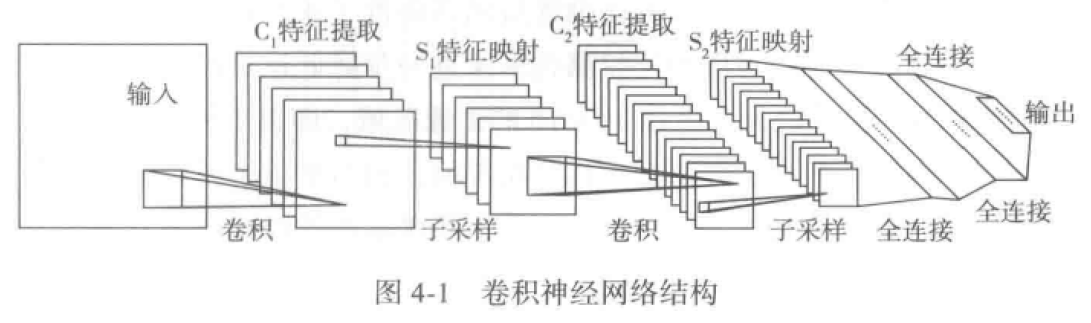

In [1]:
#from keras.layers import Flatten
#搭建神经网络结构时,加入Flatten()层
#model.add(Flatten())
#Flattern函数将返回一组拷贝数据,对于输入的二维数据，默认按行展开，输出一维数据。
#该函数可将卷积过程中输出的二维数据转换成一维数据输入全连接层

### 4.1.1 卷积神经网络特点

### 1. 局部连接

### 2. 权值共享

### 4.1.2 卷积层

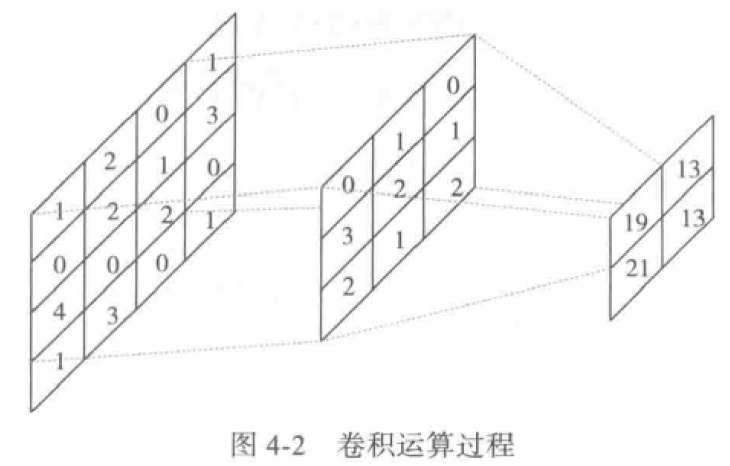

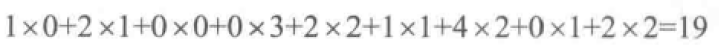

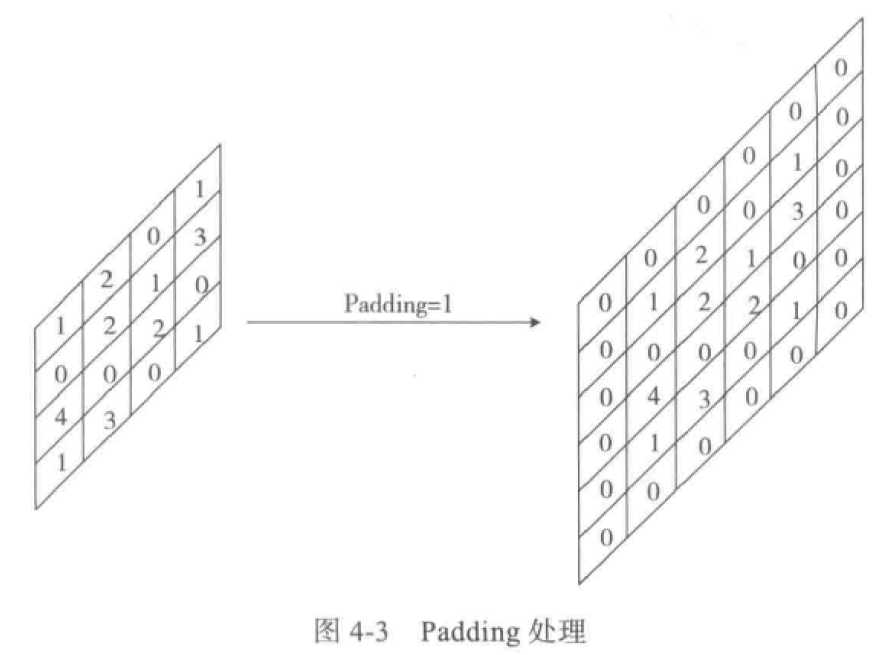

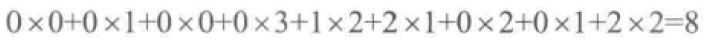

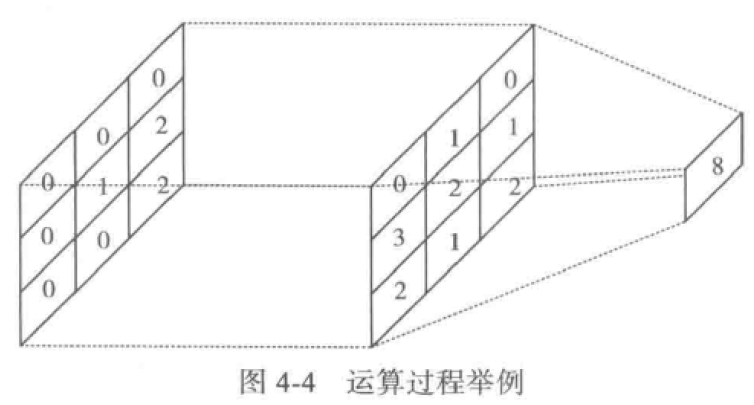

In [2]:
from keras.layers import Conv2D

Using TensorFlow backend.


Conv2D中的参数及参数解释如下。

In [ ]:
keras.layers.convolutional.Conv2D(
    filters,            #卷积核的数目(即输出的维度)
    kernel_size,        #卷积核的宽度和长度
    strides=(1,1),      #卷积的步长
    padding='valid',    #channels_first或channels_last。channels_first对应的输入shape是(batch,height,width,channels),channels_last对应输入shape
                        #是(batch,channels,height,width)。默认是channels_last
    dilation_rate(1,1), #指定膨胀比例。
    activation=None,    #激活函数
    use_bias=True,      #是否使用偏置项
    kernel_initializer='glorot_uniform',   #权重初始化方法
    bias_initializer='zeros',              #偏置初始化方法
    kernel_regularizer=None,               #对权重施加正则项
    bias_regularizer=None,                 #对偏置施加正则项
    activity_regularizer=None,             #对输出施加正则项
    kernel_constraint=None,                #对权重施加约束项
    bias_constraint=None                   #对偏置施加约束项
)

### 4.1.3 池化层

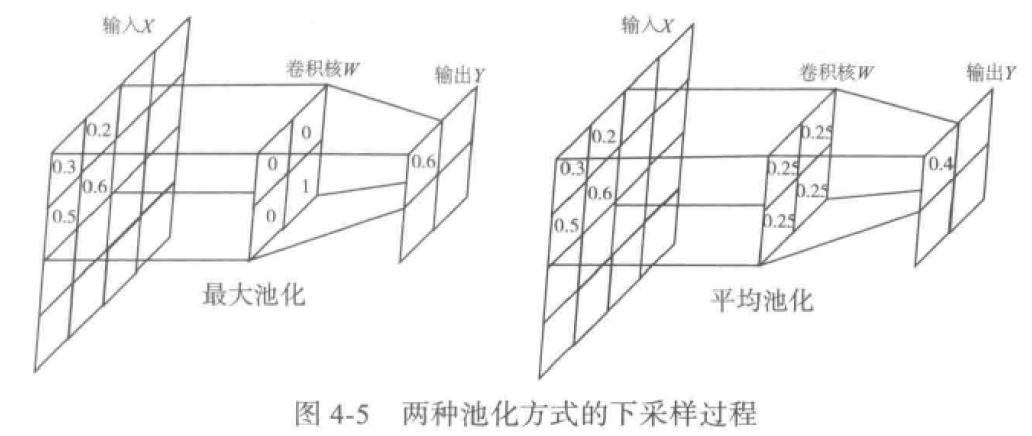

In [3]:
from keras.layers import MaxPool2D

MaxPool2D中的参数及参数解释如下。

In [ ]:
keras.layers.pooling.MaxPooling2D(
    pool_size=(2,2),  #池化窗口的大小
    strides=None,     #池化操作的步长
    padding='valid',  #为valid或者same
    data_format=None  #channels_last或channels_first,默认为channels_last
)

### 4.1.4 全连接层

In [4]:
from keras.layers import Dense

Dense中的参数及参数解释如下。

In [ ]:
keras.layers.Dense(  
    units,                   #该层神经元个数，也是该层输出神经元个数  
    activation=None,         #选择激活函数   
    use_bias=True,           #是否添加偏置  
    kernel_initializer='glorot_uniform',  #权重初始化方法  
    bias_initializer='zeros',            #偏置初始化方法  
    kernel_regularizer=None,             #对权重施加正则项  
    bias_regularizer=None,               #对偏置施加正则项  
    activity_regularizer=None,           #对输出施加正则项  
    kernel_constraint=None,              #对权重施加约束项  
    bias_constraint=None                 #对偏置施加约束项  
)  

## 4.2 卷积神经网络工作过程

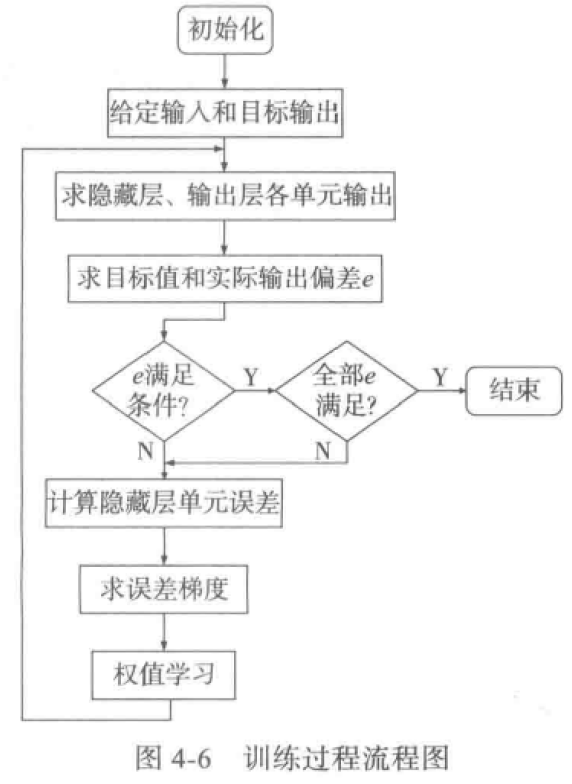

## 4.3 简单卷积神经网络实现MNIST分类

### 4.3.1 MNIST数据集预处理

### 1. 图像数据预处理

#### 【例4-1】MNIST数据预处理。

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
#数据集下载
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
X_test1 = X_test   #备份未经数据预处理的测试数据，为最后预测阶段准备
Y_test1 = Y_test   #备份未经数据预处理的测试标签，为最后预测阶段准备

In [5]:
#-1表示系统自动找样本个数(60000个),1表示单色,在tensorflow下,该通道默认channels_last,即(28,28,1),
#在theano下则默认为channels_first,即(1,28,28)
X_train = X_train.reshape(-1,28,28,1)   
X_test  = X_test.reshape(-1,28,28,1)    

In [6]:
X_train = X_train.astype('float32')  #对训练数据进行浮点型转换
X_test  = X_test.astype('float32')   #对测试数据进行浮点型转换
X_train = X_train/255.0              #对训练数据进行标准化转换
X_test  = X_test/255.0               #对测试数据进行标准化转换  

In [7]:
#nb_class为分类类别数目，MNIST为十分类
from keras.utils import np_utils
nb_class = 10   
Y_train = np_utils.to_categorical(Y_train,nb_class) #对训练标签进行one-hot标签转换
Y_test  = np_utils.to_categorical(Y_test,nb_class)  #对测试标签进行one-hot标签转换

### 4.3.2 简单卷积神经网络搭建

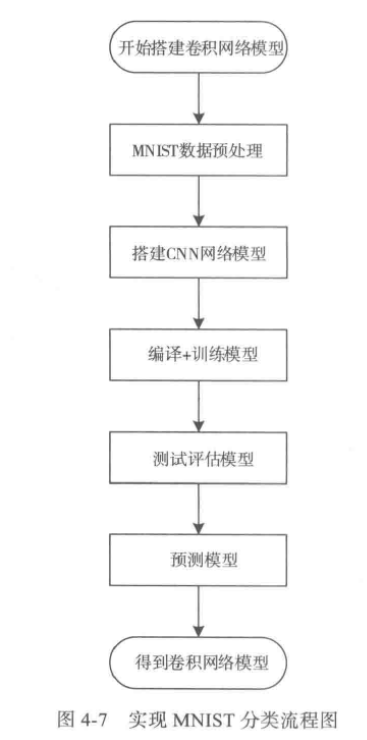

#### 【例4-2】采用Sequential 模型搭建简单卷积神经网络结构。

In [8]:
#从keras中导入sequential模块
from keras.models import Sequential
#从keras中导入layers模块，为搭建卷积层池化层输出做准备
from keras.layers import Convolution2D,Activation,MaxPool2D,Flatten,Dense,Dropout

In [9]:
model=Sequential()

In [10]:
#第1层卷积层,输入图像格式为28×28×1,32个卷积核，每个卷积核大小为5×5,padding 选择same方式
model.add(Convolution2D(
    filters=32,            #卷积核个数为32
    kernel_size=(5,5),     #卷积核大小为5×5
    padding='same',        #像素填充方式选择same
    input_shape=(28,28,1)  #输入数据28×28×1
))
#激活函数选取Relu函数
model.add(Activation('relu'))

In [11]:
model.add(MaxPool2D(
    pool_size=(2,2),    #池化窗口大小为2×2
    strides=(2,2),      #池化步长为2
    padding="same",     #像素填充方式选择same
))

In [12]:
#搭建第2层卷积层和池化层
model.add(Convolution2D(
    filters=64,            #卷积核个数为64
    kernel_size=(5,5),     #卷积核大小为5×5
    padding='same',        #像素填充方式选择same
))
#激活函数选取Relu函数
model.add(Activation('relu'))
model.add(MaxPool2D(
    pool_size=(2,2),    #池化窗口大小为2×2
    strides=(2,2),      #池化步长为2
    padding="same",     #像素填充方式选择same
))

In [13]:
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.add(Dense(nb_class))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

#### 【例4-3】网络模型可视化。

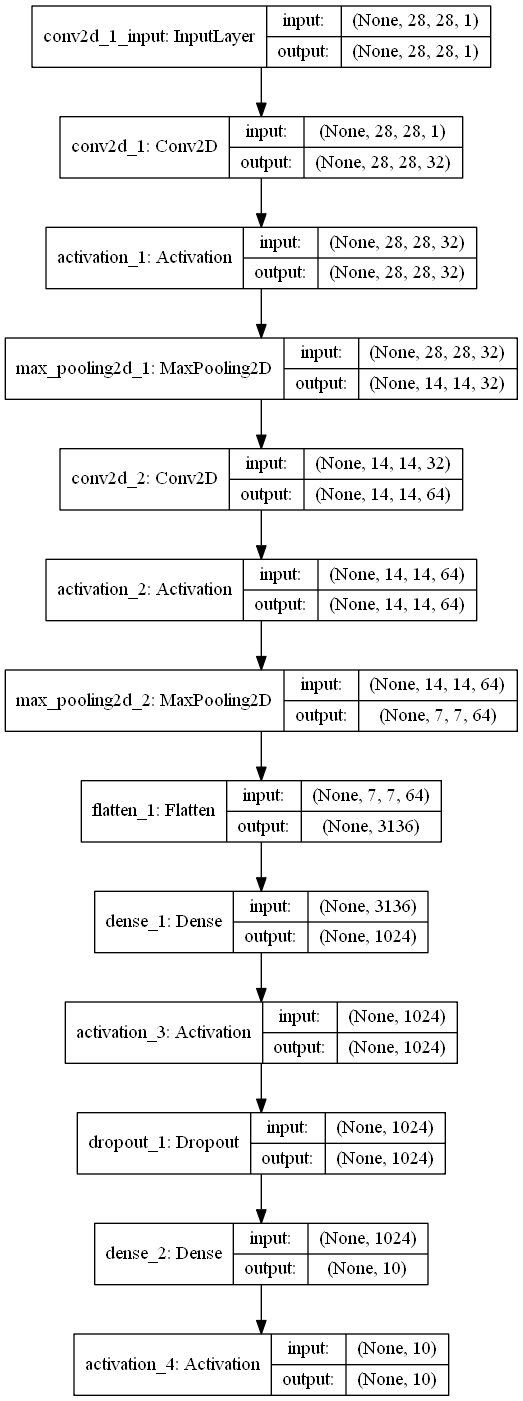

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model=model,to_file='mode_cnn.png',show_shapes=True)

#### 【例4-4】对网络结构进行编译与训练。

In [17]:
model.compile(
    optimizer='adam',                    #优化器选择adam
    loss = 'categorical_crossentropy',   #损失函数选择交叉熵函数
    metrics=['accuracy'],                #以准确率评估模型训练结果
)

In [18]:
nb_epoch = 4
batchsize = 1024
validation_split = 0.2   #验证集比例
Training = model.fit(
    x=X_train,y=Y_train,     #输入训练数据，训练标签
    epochs = nb_epoch,
    batch_size = batchsize,
    verbose = 1,           #输出进度条记录
    validation_split = validation_split,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/4





48000/48000 [==============================] - 43s 885us/step - loss: 0.4770 - acc: 0.8611 - val_loss: 0.1263 - val_acc: 0.9622
Epoch 2/4
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0954 - acc: 0.9709 - val_loss: 0.0705 - val_acc: 0.9788
Epoch 3/4
48000/48000 [==============================] - 62s 1ms/step - loss: 0.0596 - acc: 0.9820 - val_loss: 0.0549 - val_acc: 0.9823
Epoch 4/4
48000/48000 [==============================] - 61s 1ms/step - loss: 0.0433 - acc: 0.9870 - val_loss: 0.0415 - val_acc: 0.9871


#### 【例4-5】训练过程随epoch变化曲线。

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
#以epoch为横坐标，在同一坐标下画出acc、val_acc随epoch变化的曲线图
def show_Training_history(Training,train,validation):
    plt.plot(Training.history[train],linestyle='-',color='b')
    plt.plot(Training.history[validation],linestyle='--',color='r')
    plt.title('Training accuracy history')
    plt.ylabel('train')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='lower right')
    plt.show()

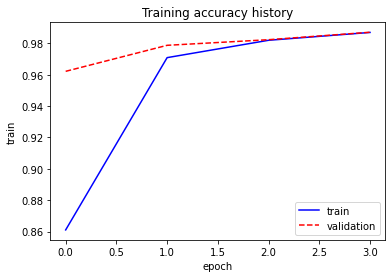

In [21]:
show_Training_history(Training,'acc','val_acc')

In [22]:
def show_Training_history(Training,train,validation):
    plt.plot(Training.history[train],linestyle='-',color='b')
    plt.plot(Training.history[validation],linestyle='--',color='r')
    plt.title('Training loss history')
    plt.ylabel('train')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    plt.show()

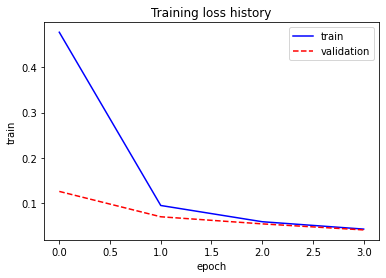

In [23]:
show_Training_history(Training,'loss','val_loss')

#### 【例4-6】用测试集对卷积网络模型进行评估。

In [24]:
#评估可通过model.evaluate()完成，分别输入；测试数据X_test、测试标签Y_test;该函数会基于X_test和Y_test计算model.compile中指定的metrics函数；
#该函数返回值为误差(loss)和准确率(accuracy)
Test = model.evaluate(X_test,Y_test,verbose=1)
print("Test loss:",Test[0])  #打印测试误差
print('Test accuracy:',Test[1]) #打印测试准确率

10000/10000 [==============================] - 3s 278us/step
Test loss: 0.033733402732911054
Test accuracy: 0.9892


#### 【例4-7】卷积网络模型进行预测。

In [25]:
prediction = model.predict_classes(X_test)

In [26]:
#定义plost_image函数，查看指定的图片
def plot_image(image):             #输入参数为image
    fig=plt.gcf()                  #获取当前图像
    fig.set_size_inches(2,2)       #设置图片大小
    plt.imshow(image,cmap='binary')
    plt.show()

In [27]:
#定义pre_results()函数，查看指定图像、真实标签及预测结果
def pre_results(i):
    plot_image(X_test1[i])
    print('Y_test1=',Y_test[i])
    print('pre_result=',prediction[i])

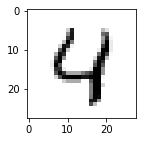

Y_test1= [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
pre_result= 4


In [28]:
pre_results(4)